In [16]:
import sympy as sp
commutative = False

J11, J14, J44, J41, J4s, Js1, Js4, Jss = sp.symbols(r'J_{11} J_{14} J_{44} J_{41} J_{4\star} J_{\star1} J_{\star4} J_{\star\star}', commutative=commutative)
# J11 = 0
J = sp.Matrix([[J11, J14, 0], [J41, J44, J4s], [0, Js4, Jss]])
J

Matrix([
[J_{11},     J_{14},              0],
[J_{41},     J_{44},     J_{4\star}],
[     0, J_{\star4}, J_{\star\star}]])

In [17]:
def make_schur(J, e=[0], k=[1,2]):
    Jee = J[e, e]
    Jek = J[e, k]
    Jke = J[k, e]
    Jkk = J[k, k]
    return Jkk - Jke * Jee ** -1 * Jek
S15 = make_schur(J)
S15

Matrix([
[-J_{41}*J_{11}**(-1)*J_{14} + J_{44},     J_{4\star}],
[                          J_{\star4}, J_{\star\star}]])

exact Q

In [18]:
alpha = sp.Symbol(r'\alpha')
alpha = 1

Qleft = sp.Matrix([[1, -J14 * J44 **-1, 0], [0, 1, 0], [0, 0, 1]])
Qright = sp.Matrix([[1, 0, 0], [-J44 ** -1 * J41, 1, 0], [0, 0, 1]])

Qright

Matrix([
[                   1, 0, 0],
[-J_{44}**(-1)*J_{41}, 1, 0],
[                   0, 0, 1]])

In [19]:
Qleft

Matrix([
[1, -J_{14}*J_{44}**(-1), 0],
[0,                    1, 0],
[0,                    0, 1]])

In [20]:
QJ = Qleft * J * Qright
# QJ = J * Qright
QJ = Qleft * J

QJ

Matrix([
[J_{11} - J_{14}*J_{44}**(-1)*J_{41},          0, -J_{14}*J_{44}**(-1)*J_{4\star}],
[                             J_{41},     J_{44},                      J_{4\star}],
[                                  0, J_{\star4},                  J_{\star\star}]])

In [21]:
# QJ[0,2] = sp.Symbol(r'\tilde{J}_{4\star}', commutative=commutative)
QJ[0,0] = sp.Symbol(r'\tilde{J}_{11}', commutative=commutative)
QJ[2,0] = sp.Symbol(r'\tilde{J}_{\star4}', commutative=commutative)
QJ

Matrix([
[    \tilde{J}_{11},          0, -J_{14}*J_{44}**(-1)*J_{4\star}],
[            J_{41},     J_{44},                      J_{4\star}],
[\tilde{J}_{\star4}, J_{\star4},                  J_{\star\star}]])

In [22]:
make_schur(QJ)

Matrix([
[    J_{44},                 J_{41}*\tilde{J}_{11}**(-1)*J_{14}*J_{44}**(-1)*J_{4\star} + J_{4\star}],
[J_{\star4}, J_{\star\star} + \tilde{J}_{\star4}*\tilde{J}_{11}**(-1)*J_{14}*J_{44}**(-1)*J_{4\star}]])

inexact Q

In [23]:
alpha = sp.Symbol(r'\alpha')
alpha = 1

D44_inv = sp.Symbol('D_{44}^{-1}', commutative=False)

Qleft = sp.Matrix([[1, -J14 * D44_inv, 0], [0, 1, 0], [0, 0, 1]])
Qright = sp.Matrix([[1, 0, 0], [-D44_inv * J41, 1, 0], [0, 0, 1]])

Qright

Matrix([
[                  1, 0, 0],
[-D_{44}^{-1}*J_{41}, 1, 0],
[                  0, 0, 1]])

In [24]:
Qleft

Matrix([
[1, -J_{14}*D_{44}^{-1}, 0],
[0,                   1, 0],
[0,                   0, 1]])

In [25]:
QJ = Qleft * J

In [26]:
# QJ = Qleft * J * Qright
# QJ = J * Qright
QJ = Qleft * J

QJ

Matrix([
[J_{11} - J_{14}*D_{44}^{-1}*J_{41}, J_{14} - J_{14}*D_{44}^{-1}*J_{44}, -J_{14}*D_{44}^{-1}*J_{4\star}],
[                            J_{41},                             J_{44},                     J_{4\star}],
[                                 0,                         J_{\star4},                 J_{\star\star}]])

In [27]:
# QJ[0,2] = sp.Symbol(r'\tilde{J}_{4\star}', commutative=commutative)
QJ[0,0] = sp.Symbol(r'\tilde{J}_{11}', commutative=commutative)
QJ[2,0] = sp.Symbol(r'\tilde{J}_{\star4}', commutative=commutative)
QJ[1,0] = sp.Symbol(r'E_{41}', commutative=commutative)
QJ

Matrix([
[    \tilde{J}_{11}, J_{14} - J_{14}*D_{44}^{-1}*J_{44}, -J_{14}*D_{44}^{-1}*J_{4\star}],
[            E_{41},                             J_{44},                     J_{4\star}],
[\tilde{J}_{\star4},                         J_{\star4},                 J_{\star\star}]])

In [28]:
make_schur(QJ)

Matrix([
[               -E_{41}*\tilde{J}_{11}**(-1)*(J_{14} - J_{14}*D_{44}^{-1}*J_{44}) + J_{44},                 E_{41}*\tilde{J}_{11}**(-1)*J_{14}*D_{44}^{-1}*J_{4\star} + J_{4\star}],
[J_{\star4} - \tilde{J}_{\star4}*\tilde{J}_{11}**(-1)*(J_{14} - J_{14}*D_{44}^{-1}*J_{44}), J_{\star\star} + \tilde{J}_{\star4}*\tilde{J}_{11}**(-1)*J_{14}*D_{44}^{-1}*J_{4\star}]])

# Fixed stress

In [29]:
import numpy as np
j = np.array([sp.symbols(' '.join([f'J_{i}{j}'for j in [0,2,1,4,5]]), commutative=commutative) for i in [0,2,1,4,5]])
j[1, 2] = 0
j[2, 1] = 0
j[3,0] = j[3,1] = j[3,2] = j[0,3] = j[1,3] = j[2,3] = 0
J = sp.Matrix(j)
J

Matrix([
[J_00, J_02, J_01,    0, J_05],
[J_20, J_22,    0,    0, J_25],
[J_10,    0, J_11,    0, J_15],
[   0,    0,    0, J_44, J_45],
[J_50, J_52, J_51, J_54, J_55]])

In [30]:
Qleft = sp.Matrix(np.eye(5, dtype=int))
Qright = sp.Matrix(np.eye(5, dtype=int))
Qleft[3, 4] = -J45 * J55 ** -1
Qright[4,3] = -J55 ** -1 * J54

Qleft

NameError: name 'J45' is not defined

In [ ]:
QJ = (J * Qright).subs(J55 ** -1 * J55, 1)
QJ

Matrix([
[J_00, J_02, J_01,       -J_05*J_{55}**(-1)*J_{54}, J_05],
[J_20, J_22,    0,       -J_25*J_{55}**(-1)*J_{54}, J_25],
[J_10,    0, J_11,       -J_15*J_{55}**(-1)*J_{54}, J_15],
[   0,    0,    0, J_44 - J_45*J_{55}**(-1)*J_{54}, J_45],
[J_50, J_52, J_51, J_54 - J_55*J_{55}**(-1)*J_{54}, J_55]])

In [ ]:
QJ[3,3]= J44 - J45 * J55 ** -1 * J54
QJ[4,3] = 0
# QJ[3,4] = 0
QJ

Matrix([
[J_00, J_02, J_01,           -J_05*J_{55}**(-1)*J_{54}, J_05],
[J_20, J_22,    0,           -J_25*J_{55}**(-1)*J_{54}, J_25],
[J_10,    0, J_11,           -J_15*J_{55}**(-1)*J_{54}, J_15],
[   0,    0,    0, J_{44} - J_{45}*J_{55}**(-1)*J_{54}, J_45],
[J_50, J_52, J_51,                                   0, J_55]])

In [ ]:
# K40 = QJ[3,0]
# K42 = QJ[3,1]
# K41 = QJ[3,2]
K04 = QJ[0,3]
K24 = QJ[1,3]
K14 = QJ[2,3]
K44 = QJ[3,3]

# QJ[3,0] = sp.Symbol('K_{40}', commutative=commutative)
# QJ[3,1] = sp.Symbol('K_{42}', commutative=commutative)
# QJ[3,2] = sp.Symbol('K_{41}', commutative=commutative)
QJ[0,3] = sp.Symbol('K_{04}', commutative=commutative)
QJ[1,3] = sp.Symbol('K_{24}', commutative=commutative)
QJ[2,3] = sp.Symbol('K_{14}', commutative=commutative)
QJ[3,3] = sp.Symbol('K_{44}', commutative=commutative)
QJ

Matrix([
[J_00, J_02, J_01, K_{04}, J_05],
[J_20, J_22,    0, K_{24}, J_25],
[J_10,    0, J_11, K_{14}, J_15],
[   0,    0,    0, K_{44}, J_45],
[J_50, J_52, J_51,      0, J_55]])

In [ ]:
def make_schur_4(J):
    keep = [0,1,2,4]
    elim = [3]
    Jkk = J[keep, keep]
    Jke = J[keep, elim]
    Jek = J[elim, keep]
    Jee = J[elim, elim]
    return Jkk - Jke * (Jee ** -1) * Jek
S4 = make_schur_4(QJ)
S4

Matrix([
[J_00, J_02, J_01, J_05 - K_{04}*K_{44}**(-1)*J_45],
[J_20, J_22,    0, J_25 - K_{24}*K_{44}**(-1)*J_45],
[J_10,    0, J_11, J_15 - K_{14}*K_{44}**(-1)*J_45],
[J_50, J_52, J_51,                            J_55]])

In [ ]:
K14 * K44 ** -1 * K41

0

In [ ]:
J

Matrix([
[J_00, J_02, J_01,    0, J_05],
[J_20, J_22,    0,    0, J_25],
[J_10,    0, J_11,    0, J_15],
[   0,    0,    0, J_44, J_45],
[J_50, J_52, J_51, J_54, J_55]])

In [ ]:
j = np.array(
    [
        sp.symbols(" ".join([f"J_{i}{j}" for j in [0, 1,]]), commutative=False)
        for i in [0, 1,]
    ]
)
J = sp.Matrix(j)


def make_ldu(mat):
    A = mat[0, 0]
    B = mat[0, 1]
    C = mat[1, 0]
    D = mat[1, 1]

    l = C * A**-1
    d = D - C * A**-1 * B
    u = A**-1 * B

    L = sp.Matrix(
        [
            [1, 0],
            [l, 1],
        ]
    )
    D = sp.Matrix(
        [
            [A, 0],
            [0, d],
        ]
    )
    U = sp.Matrix(
        [
            [1, u],
            [0, 1,],
        ]
    )
    return L, D, U


L, D, U = make_ldu(J)

L * D * U

Matrix([
[J_00, J_01],
[J_10, J_11]])

In [ ]:
L * D * U * U.inv() * D.inv() * L.inv()

Matrix([
[1, 0],
[0, 1]])

In [ ]:
U

Matrix([
[1, J_00**(-1)*J_01],
[0,               1]])

In [ ]:
U.inv()

Matrix([
[1, -J_00**(-1)*J_01],
[0,                1]])

In [ ]:
D

Matrix([
[J_00,                            0],
[   0, -J_10*J_00**(-1)*J_01 + J_11]])

- LD is preferred for left preconditioning
- DU is preferred for right preconditioning

How to represent the full preconditioner in a matrix form:
1. $J_1 = J \cdot Q_r$

$P \cdot x \approx J^{-1} \cdot x$

$P = U_0^{-1} \cdot D_0^{-1} \cdot L_0^{-1} $

$L^{-1} = \begin{bmatrix} 
1 & 
\\
-C \cdot A^{-1}&
1
\end{bmatrix}$

$D^{-1} = \begin{bmatrix} 
A^{-1} \\
&
D^{-1}
 \end{bmatrix}$


# Nested Schur complements - only upper

In [ ]:
import sympy as sp
import numpy as np

j = np.array(
    [
        sp.symbols(" ".join([f"J_{i}{j}" for j in [0, 1, 2]]), commutative=False)
        for i in [0, 1, 2]
    ]
)
J = sp.Matrix(j)
J

Matrix([
[J_00, J_01, J_02],
[J_10, J_11, J_12],
[J_20, J_21, J_22]])

In [ ]:
L0 = sp.Matrix(
    [
        [1, 0, 0],
        [j[1,0] * j[0,0] ** -1, 1, 0],
        [j[2,0] * j[0,0] ** -1, 0, 1],
    ]
)
D0 = sp.Matrix([
    [j[0,0], 0, 0],
    [0, j[1,1] - j[1,0] * j[0,0] ** -1 * j[0, 1], j[1,2] - j[1,0] * j[0,0] ** -1 * j[0, 2]],
    [0, j[2,1] - j[2,0] * j[0,0] ** -1 * j[0, 1], j[2,2] - j[2,0] * j[0,0] ** -1 * j[0, 2]]

])
U0 = sp.Matrix([
    [1, j[0,0] ** -1 * j[0, 1], j[0,0] ** -1 * j[0, 2]],
    [0, 1, 0],
    [0, 0, 1],
])
L0 * D0 * U0

Matrix([
[J_00, J_01, J_02],
[J_10, J_11, J_12],
[J_20, J_21, J_22]])

In [ ]:
L1 = sp.Matrix(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, D0[2, 1] * D0[1, 1] ** -1, 1],
    ]
)
D1 = sp.Matrix(
    [
        [j[0,0], 0, 0],
        [0, D0[1, 1], 0],
        [0, 0, D0[2, 2] - D0[2, 1] * D0[1, 1] ** -1 * D0[1, 2]],
    ]
)
U1 = sp.Matrix(
    [
        [1, 0, 0],
        [0, 1, D0[1, 1] ** -1 * D0[1, 2]],
        [0, 0, 1]
    ]
)
L1 * D1 * U1

Matrix([
[J_00,                            0,                            0],
[   0, -J_10*J_00**(-1)*J_01 + J_11, -J_10*J_00**(-1)*J_02 + J_12],
[   0, -J_20*J_00**(-1)*J_01 + J_21, -J_20*J_00**(-1)*J_02 + J_22]])

In [ ]:
L0 * L1 * D1 * U1 * U0

Matrix([
[J_00, J_01, J_02],
[J_10, J_11, J_12],
[J_20, J_21, J_22]])

applying only DU

In [ ]:
sp.simplify(L0 * L1 * D1 * U1 * U0 * U0.inv() * U1.inv() * D1.inv())

Matrix([
[              1,                                                                   0, 0],
[J_10*J_00**(-1),                                                                   1, 0],
[J_20*J_00**(-1), (-J_20*J_00**(-1)*J_01 + J_21)*(-J_10*J_00**(-1)*J_01 + J_11)**(-1), 1]])

In [ ]:
U0.inv() * U1.inv()

Matrix([
[1, -J_00**(-1)*J_01, -J_00**(-1)*J_01*((-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_10*J_00**(-1)*J_02 - (-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_12) - J_00**(-1)*J_02],
[0,                1,                                      (-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_10*J_00**(-1)*J_02 - (-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_12],
[0,                0,                                                                                                                                          1]])

In [ ]:
sp.simplify(U0.inv() * U1.inv() * D1.inv(), )

Matrix([
[J_00**(-1), -(-J_10 + J_11*J_01**(-1)*J_00)**(-1), -((-J_20*J_00**(-1)*J_01*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_10*J_00**(-1)*J_02 + J_20*J_00**(-1)*J_01*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_12 - J_20*J_00**(-1)*J_02 + J_21*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_10*J_00**(-1)*J_02 - J_21*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_12 + J_22)*(J_01*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*(J_10*J_00**(-1)*J_02 - J_12) + J_02)**(-1)*J_00)**(-1)],
[         0,  (-J_10*J_00**(-1)*J_01 + J_11)**(-1),                           ((-J_20*J_00**(-1)*J_01*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_10*J_00**(-1)*J_02 + J_20*J_00**(-1)*J_01*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_12 - J_20*J_00**(-1)*J_02 + J_21*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_10*J_00**(-1)*J_02 - J_21*(-J_10*J_00**(-1)*J_01 + J_11)**(-1)*J_12 + J_22)*(J_10*J_00**(-1)*J_02 - J_12)**(-1)*(-J_10*J_00**(-1)*J_01 + J_11))**(-1)],
[         0,                                     0,                                                

* Full: U D L
* Upper: U D
* Lower: D L

In [4]:
import sympy as sp

j00, j01, j10, j11 = sp.symbols("J_{00} J_{01} J_{10} J_{11}", commutative=False)
j00 = 0
J = sp.Matrix(
    [
        [j00, j01],
        [j10, j11],
    ]
)


def factorize_2x2(J):
    L = sp.Matrix([[1, 0], [J[1, 0] * J[0, 0] ** -1, 1]])
    D = sp.Matrix([[J[0, 0], 0], [0, J[1, 1] - J[1, 0] * J[0, 0] ** -1 * J[0, 1]]])
    U = sp.Matrix([[1, J[0, 0] ** -1 * J[0, 1]], [0, 1]])
    return L, D, U


L, D, U = factorize_2x2(J)

In [7]:
U

Matrix([
[1, zoo],
[0,   1]])

In [3]:
J * U.inv() * D.inv() * L.inv()

Matrix([
[                                                                                                      1,                                                             0],
[J_{10}*J_{00}**(-1) - J_{10}*J_{00}**(-1)*J_{01}*(J_{10}*J_{00}**(-1)*J_{01})**(-1)*J_{10}*J_{00}**(-1), J_{10}*J_{00}**(-1)*J_{01}*(J_{10}*J_{00}**(-1)*J_{01})**(-1)]])

In [ ]:
Qr = sp.Matrix([[1, 0], [-j11 ** -1 * j10, 1]])
Qr

Matrix([
[                   1, 0],
[-J_{11}**(-1)*J_{10}, 1]])

In [ ]:
Ql = sp.Matrix([[1, -j01 * j11 ** -1], [0, 1]])
Ql

Matrix([
[1, -J_{01}*J_{11}**(-1)],
[0,                    1]])

In [ ]:
# Jq = J * Qr
Jq = Ql * J
Jq

Matrix([
[J_{00} - J_{01}*J_{11}**(-1)*J_{10},      0],
[                             J_{10}, J_{11}]])

In [ ]:
Lq, Dq, Uq = factorize_2x2(Jq)
Jq * Uq.inv() * Dq.inv() * Lq.inv()

Matrix([
[1, 0],
[0, 1]])

In [ ]:
Uq

Matrix([
[1, 0],
[0, 1]])

In [ ]:
Jq * Dq.inv()

Matrix([
[                                                 1, 0],
[J_{10}*(J_{00} - J_{01}*J_{11}**(-1)*J_{10})**(-1), 1]])

In [ ]:
Ql

Matrix([
[1, -J_{01}*J_{11}**(-1)],
[0,                    1]])

3x3

In [ ]:
import sympy as sp
import numpy as np

J = sp.Matrix(np.array([sp.symbols(' '.join([f'J_{i}{j}'for j in range(3)]), commutative=False) for i in range(3)]))

Ql = sp.Matrix([
    [1, -J[0,1] * J[1, 1] ** -1, 0],
    [0, 1, 0],
    [0, 0, 1]
])
Jq = Ql * J
Jq

Matrix([
[J_00 - J_01*J_11**(-1)*J_10,    0, -J_01*J_11**(-1)*J_12 + J_02],
[                       J_10, J_11,                         J_12],
[                       J_20, J_21,                         J_22]])

In [ ]:

def make_ldu_3x3(j):

    L0 = sp.Matrix(
        [
            [1, 0, 0],
            [j[1,0] * j[0,0] ** -1, 1, 0],
            [j[2,0] * j[0,0] ** -1, 0, 1],
        ]
    )
    D0 = sp.Matrix([
        [j[0,0], 0, 0],
        [0, j[1,1] - j[1,0] * j[0,0] ** -1 * j[0, 1], j[1,2] - j[1,0] * j[0,0] ** -1 * j[0, 2]],
        [0, j[2,1] - j[2,0] * j[0,0] ** -1 * j[0, 1], j[2,2] - j[2,0] * j[0,0] ** -1 * j[0, 2]]

    ])
    U0 = sp.Matrix([
        [1, j[0,0] ** -1 * j[0, 1], j[0,0] ** -1 * j[0, 2]],
        [0, 1, 0],
        [0, 0, 1],
    ])
    L1 = sp.Matrix(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, D0[2, 1] * D0[1, 1] ** -1, 1],
    ]
    )
    D1 = sp.Matrix(
        [
            [j[0,0], 0, 0],
            [0, D0[1, 1], 0],
            [0, 0, D0[2, 2] - D0[2, 1] * D0[1, 1] ** -1 * D0[1, 2]],
        ]
    )
    U1 = sp.Matrix(
        [
            [1, 0, 0],
            [0, 1, D0[1, 1] ** -1 * D0[1, 2]],
            [0, 0, 1]
        ]
    )
    return L0, L1, D1, U1, U0
L0, L1, D1, U1, U0 = make_ldu_3x3(Jq)

L1 * D1 * U1

Matrix([
[J_00 - J_01*J_11**(-1)*J_10,    0,                                                                               0],
[                          0, J_11, -J_10*(J_00 - J_01*J_11**(-1)*J_10)**(-1)*(-J_01*J_11**(-1)*J_12 + J_02) + J_12],
[                          0, J_21, -J_20*(J_00 - J_01*J_11**(-1)*J_10)**(-1)*(-J_01*J_11**(-1)*J_12 + J_02) + J_22]])

In [ ]:
U = U0 * U1
U

Matrix([
[1, 0,                           (J_00 - J_01*J_11**(-1)*J_10)**(-1)*(-J_01*J_11**(-1)*J_12 + J_02)],
[0, 1, J_11**(-1)*(-J_10*(J_00 - J_01*J_11**(-1)*J_10)**(-1)*(-J_01*J_11**(-1)*J_12 + J_02) + J_12)],
[0, 0,                                                                                            1]])

In [ ]:
D = D1
L = L0 * L1
L

Matrix([
[                                       1,               0, 0],
[J_10*(J_00 - J_01*J_11**(-1)*J_10)**(-1),               1, 0],
[J_20*(J_00 - J_01*J_11**(-1)*J_10)**(-1), J_21*J_11**(-1), 1]])

In [ ]:
sp.simplify(Jq * U0.inv() * U1.inv() * D.inv())

Matrix([
[                                       1,               0, 0],
[J_10*(J_00 - J_01*J_11**(-1)*J_10)**(-1),               1, 0],
[J_20*(J_00 - J_01*J_11**(-1)*J_10)**(-1), J_21*J_11**(-1), 1]])

In [ ]:
U0

Matrix([
[1, 0, (J_00 - J_01*J_11**(-1)*J_10)**(-1)*(-J_01*J_11**(-1)*J_12 + J_02)],
[0, 1,                                                                  0],
[0, 0,                                                                  1]])

In [40]:
import sympy as sp

lambda_t, lambda_n, c, u_t, F = sp.symbols(r"\lambda_t {|\lambda_n|} c u_t F")
# z = sp.Symbol("z")
z = sp.Function('z')(lambda_t, u_t)
z_expr = lambda_t + c * u_t
z_expr

\lambda_t + c*u_t

In [41]:
norm = sp.Function('norm')
# norm = lambda x: sp.sqrt(x ** 2)
# norm = lambda x: sp.Symbol(r"{||" + str(x) + "||}")

expr = lambda_t * norm(z) + F * lambda_n * z
expr

F*{|\lambda_n|}*z(\lambda_t, u_t) + \lambda_t*norm(z(\lambda_t, u_t))

In [42]:
# expr = expr.subs(norm(z), sp.sqrt(z_expr ** 2)).subs(z, z_expr)
expr

F*{|\lambda_n|}*z(\lambda_t, u_t) + \lambda_t*norm(z(\lambda_t, u_t))

In [43]:
expr.diff(lambda_t)

F*{|\lambda_n|}*Derivative(z(\lambda_t, u_t), \lambda_t) + \lambda_t*Derivative(norm(z(\lambda_t, u_t)), z(\lambda_t, u_t))*Derivative(z(\lambda_t, u_t), \lambda_t) + norm(z(\lambda_t, u_t))

In [44]:
expr.diff(lambda_t).subs(z, z_expr).doit()

F*{|\lambda_n|} + \lambda_t*Subs(Derivative(norm(_xi), _xi), _xi, \lambda_t + c*u_t) + norm(\lambda_t + c*u_t)

In [39]:
expr.diff(u_t).subs(z, z_expr).doit()

F*c*{|\lambda_n|} + \lambda_t*c*Subs(Derivative(norm(_xi), _xi), _xi, -\lambda_t + c*u_t)

In [ ]:
expr.diff(u_t)

In [20]:
expr.diff(lambda_n)

-F*(-\lambda_t + c*u_t)

Text(0.5, 0, '$\\lambda$')

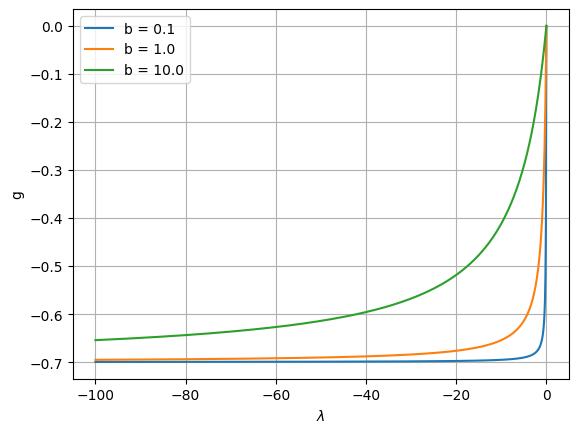

In [66]:
import numpy as np
from matplotlib import pyplot as plt

# g0 = 10
for b in [1e-1, 1e0, 1e1]:
    a = 0.7
    # x = np.linspace(- a * b * 100, a * b / 10, 1000)
    lambda_n = np.linspace(-100, 0, 1000)
    g = a * lambda_n / (a * b - lambda_n)
    # g = a ** 2 * b / (a * b - x) ** 2
    # g = abs(g)
    # x = abs(x)
    plt.plot(lambda_n, g, label=f'{b = }')
plt.legend()
plt.grid()
plt.ylabel('g')
plt.xlabel(r'$\lambda$')
# plt.yscale('log')

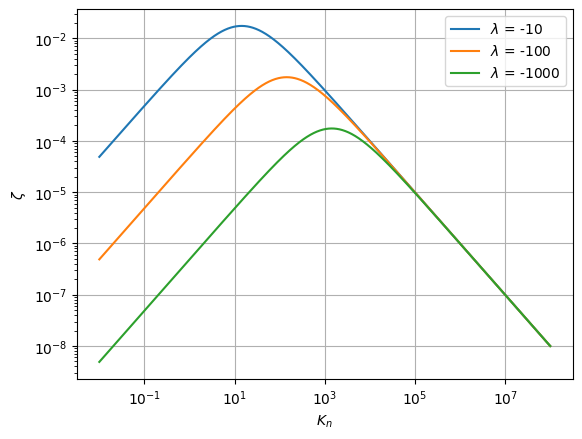

In [75]:
import numpy as np
from matplotlib import pyplot as plt

# g0 = 10
for lambda_n in [-10, -100, -1000]:
    a = 0.7
    b = np.logspace(-2, 8, 1000)
    g = a ** 2 * b / (a * b - lambda_n) ** 2
    plt.plot(b, g, label=fr'$\lambda$ = {lambda_n}')
plt.legend()
plt.grid()
plt.ylabel(r'$\zeta$')
plt.xlabel('$K_n$')
plt.xscale('log')
plt.yscale('log')

In [76]:
import sympy as sp

a, b, lambda_n, g0 = sp.symbols('a b x g_0')
u  = g0 + a * lambda_n / (a * b - lambda_n)
u

a*x/(a*b - x) + g_0

In [79]:
zeta = sp.simplify(u.diff(lambda_n))
zeta

a**2*b/(a*b - x)**2

In [82]:
tmp = sp.simplify(zeta.diff(b))
tmp

a**2*(-a*b - x)/(a*b - x)**3

In [84]:
sp.solve(tmp, b)[0]

-x/a

In [86]:
sp.solve(tmp, a)

[0, -x/b]

# Understanding Newton

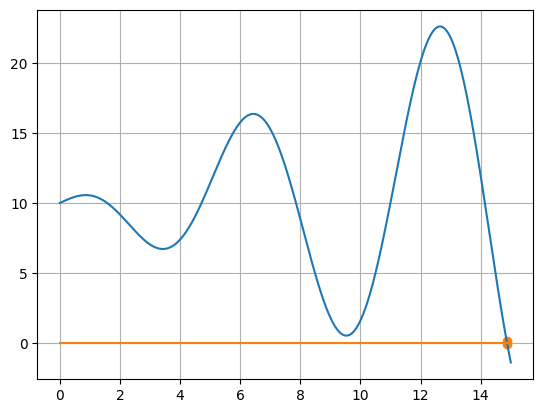

In [39]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

xsym = sp.Symbol('x')
ysym = xsym * sp.cos(xsym) + 10
lambda_norm_space = np.linspace(0, 15, 1000)
lambda_t = sp.lambdify(xsym, ysym)
dy = sp.lambdify(xsym, ysym.diff(xsym))
u_t_space = lambda_t(lambda_norm_space)
answer = np.argsort(abs(u_t_space))[:2]

plt.plot(lambda_norm_space, u_t_space)
plt.scatter(lambda_norm_space[answer], u_t_space[answer], color='C1')
plt.plot([lambda_norm_space[0], lambda_norm_space[-1]], [0, 0], color='C1')
plt.grid()

In [42]:
lambda_n = 3
eps = 1e-10
xlist = [lambda_n]
for i in range(1000):
    delta_x = lambda_t(lambda_n) / dy(lambda_n)
    lambda_n -= delta_x
    xlist.append(lambda_n)
    if abs(lambda_t(lambda_n)) < eps:
        break

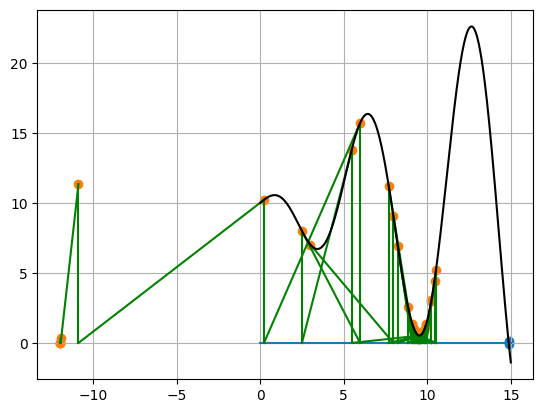

In [43]:
plt.scatter(lambda_norm_space[answer], u_t_space[answer])
plt.plot([lambda_norm_space[0], lambda_norm_space[-1]], [0, 0])
plt.scatter(xlist, lambda_t(xlist))
for xstart, xend in zip(xlist[:-1], xlist[1:]):
    plt.plot([xstart, xend], [lambda_t(xstart), 0], color='green')
    plt.plot([xend, xend], [0, lambda_t(xend)], color='green')

plt.plot(lambda_norm_space, u_t_space, color='black')
plt.grid()

# Understanding contact relations with Newton

In [89]:
import sympy as sp

u_t, u_n, lambda_t, lambda_n, c, zeta, F = sp.symbols(r'u_t u_n \lambda_t \lambda_n c \zeta F', real=True)

a, b, K_t, g_0, theta = sp.symbols(r'a b K_t g_0, tan(\theta)', real=True)


g = g_0 + a * lambda_n / (a * b - lambda_n) + theta * sp.sqrt((u_t - lambda_t / K_t) ** 2 + (u_n - a * lambda_n / (a * b - lambda_n)) ** 2)
g

\lambda_n*a/(-\lambda_n + a*b) + g_0 + tan(\theta)*sqrt((u_t - \lambda_t/K_t)**2 + (-\lambda_n*a/(-\lambda_n + a*b) + u_n)**2)

In [92]:
sp.simplify(g.diff(lambda_n))

\lambda_n*a/(\lambda_n - a*b)**2 - a/(\lambda_n - a*b) - tan(\theta)*(2*\lambda_n*a/(\lambda_n - a*b)**2 - 2*a/(\lambda_n - a*b))*(\lambda_n*a/(\lambda_n - a*b) + u_n)/(2*sqrt((u_t - \lambda_t/K_t)**2 + (\lambda_n*a/(\lambda_n - a*b) + u_n)**2))

In [85]:
normal = lambda_n + sp.Max(0, -lambda_n - c * (u_n - zeta * lambda_n))
normal

\lambda_n + Max(0, -\lambda_n - c*(-\lambda_n*\zeta + u_n))

In [71]:
z = lambda_t + c * u_t
b = - F * lambda_n
tangential = -lambda_t * sp.Max(b, sp.Abs(z)) + sp.Max(b, 0) * z
tangential

-\lambda_t*Max(-F*\lambda_n, Abs(\lambda_t + c*u_t)) + (\lambda_t + c*u_t)*Max(0, -F*\lambda_n)

In [75]:
var = sp.Matrix([lambda_n, lambda_t])
eq = sp.Matrix([[normal], [tangential]]).subs({F: 1, c: 1, zeta: 2, u_n: 0, u_t: 0})
eq

Matrix([
[                                           \lambda_n + Max(0, \lambda_n)],
[\lambda_t*Max(0, -\lambda_n) - \lambda_t*Max(-\lambda_n, Abs(\lambda_t))]])

In [76]:
jac = eq.diff(var).reshape(2, 2).transpose().as_immutable()
jac

[[Heaviside(\lambda_n) + 1, 0], [-\lambda_t*Heaviside(-\lambda_n) + \lambda_t*Heaviside(-\lambda_n - Abs(\lambda_t)), -\lambda_t*Heaviside(\lambda_n + Abs(\lambda_t))*sign(\lambda_t) + Max(0, -\lambda_n) - Max(-\lambda_n, Abs(\lambda_t))]]

In [77]:
jac

[[Heaviside(\lambda_n) + 1, 0], [-\lambda_t*Heaviside(-\lambda_n) + \lambda_t*Heaviside(-\lambda_n - Abs(\lambda_t)), -\lambda_t*Heaviside(\lambda_n + Abs(\lambda_t))*sign(\lambda_t) + Max(0, -\lambda_n) - Max(-\lambda_n, Abs(\lambda_t))]]

In [84]:
import numpy as np

initial_guess = [-1, -100]

def newton_iter(x):
    rhs = np.array(eq.subs({lambda_n: x[0], lambda_t: x[1]}, dtype=float))
    mat = np.array(jac.subs({lambda_n: x[0], lambda_t: x[1]}), dtype=float)


lambda_n = initial_guess


array([[   1.,    0.],
       [ 100., -199.]])

In [96]:
import numpy as np

def func(x, y):
    return np.array([x * y, x - y])



def jac(x, y):
    return np.array([[y, x], [-1, 1]])


sol = np.array([100, 100], dtype=float)

for i in range(50):
    J = jac(*sol)
    rhs = func(*sol)
    if (np.linalg.norm(rhs) < 1e-8):
        break
    sol += np.linalg.solve(J, -rhs)

sol

array([9.53674316e-05, 9.53674316e-05])

In [400]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

lambda_n, lambda_t, u_n, u_t = sp.symbols("x y u_n u_t", real=True)

c = 6

# barton_bandis = 6 * lambda_n / (6 * 3 - lambda_n)
barton_bandis = 0

eq = sp.Matrix(
    [
        lambda_n + sp.Max(0, -lambda_n - c * (u_n - 10 - barton_bandis)),
        -lambda_t * sp.Max(-lambda_n, sp.Abs(lambda_t + c * u_t)) + sp.Max(-lambda_n, 0) * (lambda_t + c * u_t),
        lambda_n + 10,
        lambda_t + 4,
    ]
)
eq

eq_func = sp.lambdify((lambda_n, lambda_t, u_n, u_t), eq)

In [401]:
jac = sp.Matrix([eq.diff(lambda_n).transpose(), eq.diff(lambda_t).transpose(), eq.diff(u_n).transpose(), eq.diff(u_t).transpose()]).transpose()
jac

jac_func = sp.lambdify((lambda_n, lambda_t, u_n, u_t), jac)

In [421]:
def func(vals):
    return eq_func(*vals).ravel()


def dfunc(vals):
    return jac_func(*vals)


sol = np.array([-5, -8, 4, -12], dtype=float)

sol_list = [sol.copy()]

for i in range(50):
    J = dfunc(sol)
    rhs = func(sol)
    if (np.linalg.norm(rhs) < 1e-8):
        break
    sol += np.linalg.solve(J, -rhs)
    sol_list.append(sol.copy())

print(i)
sol

3


array([-10.,  -4.,  10.,   0.])

In [428]:
lambda_norm_space =np.linspace(-20, 10, 100)
u_t_space = np.linspace(-50, 10, 100)
LAMBDA_NORM, U_T = np.meshgrid(lambda_norm_space, u_t_space, indexing='ij')
vals = np.array([func([x_, 0, 10, u_t_]) for [x_, u_t_] in zip(LAMBDA_NORM.ravel(), U_T.ravel())]).reshape(100, 100, 4)

In [429]:
sticking = sp.Abs(lambda_t + c * u_t) - -lambda_n
sticking = sp.lambdify((lambda_n, lambda_t, u_n, u_t), sticking)
sticking = np.array([sticking(x_, 0, 10, y_) for [x_, y_] in zip(LAMBDA_NORM.ravel(), U_T.ravel())]).reshape(100, 100)
sticking = sticking <= 0

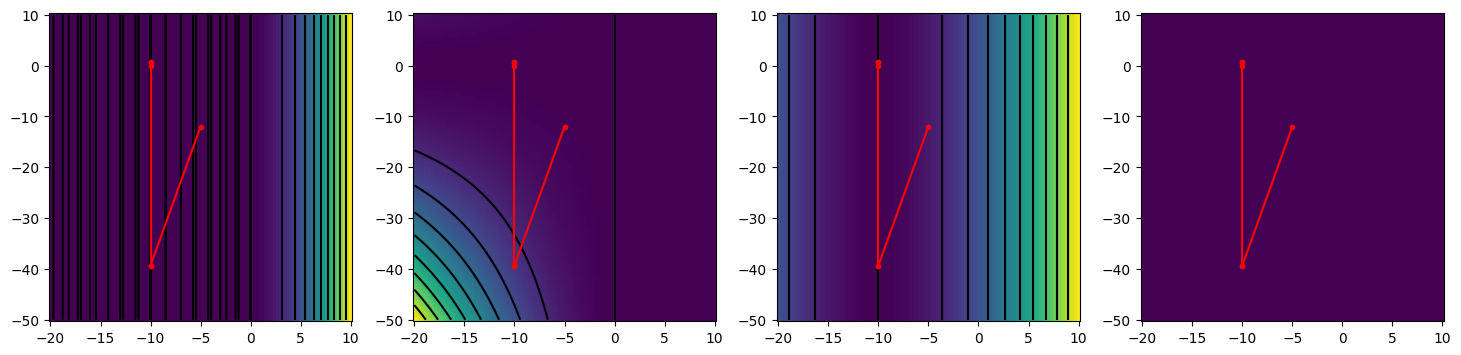

In [432]:
plt.figure(figsize=(18, 4))

for i in range(4):
    plt.subplot(1, 4, i+1)

    # loss = np.log(abs(vals[:, :, i] + 1e-10))
    loss = vals[:, :, i] ** 2
    plt.pcolormesh(LAMBDA_NORM, U_T, loss)
    # plt.pcolormesh(LAMBDA_NORM, U_T, sticking)
    plt.contour(LAMBDA_NORM, U_T, loss, levels=10, colors='black', norm='log')


    sol_list = np.array(sol_list)

    for [x0, _, _, y0], [x1, _, _, y1] in zip(sol_list[:-1], sol_list[1:]):
        plt.plot([x0, x1], [y0, y1], color='red', marker='.')

# Inconsistency in contact laws

/tmp/ipykernel_2303674/8929468.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Set1", np.max(encoded_values) + 1)


Text(0, 0.5, '$u_n$')

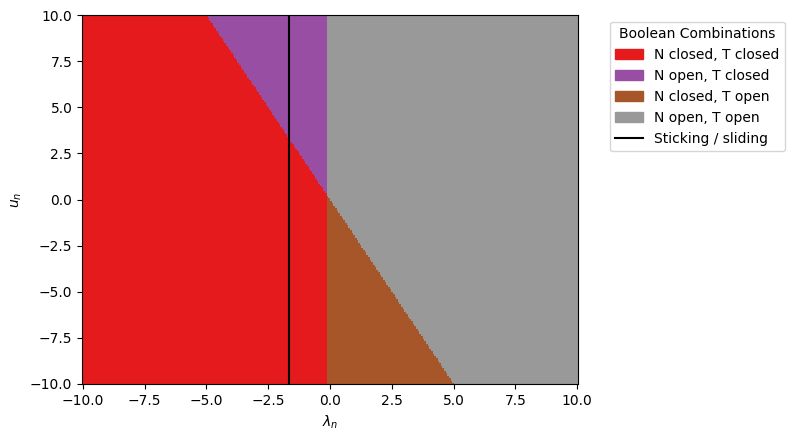

In [61]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


c = 5e-1
F = 0.9
eps = 1e-1
u_t = 1
lambda_t = 1


def normal(lambda_n, u_n):
    return -lambda_n - c * u_n


def tang(lambda_n):
    return -lambda_n * F - eps


lambda_n_space = np.linspace(-10, 10, 300)
u_n_space = np.linspace(-10, 10, 300)

lambda_sliding = -abs(lambda_t + c * u_t) / F

LAMBDA_N, U_N = np.meshgrid(lambda_n_space, u_n_space)

normal_open = normal(LAMBDA_N, U_N) < 0
tang_open = tang(LAMBDA_N) < 0

bool_stack = np.stack([normal_open, tang_open], axis=-1)
encoded_values = np.sum(bool_stack * (2 ** np.arange(bool_stack.shape[-1])), axis=-1)

cmap = plt.cm.get_cmap("Set1", np.max(encoded_values) + 1)

# Plot the grid
plt.plot([lambda_sliding, lambda_sliding], [-10, 10], color='black', label='Sticking / sliding')
legend = plt.legend()
plt.pcolormesh(LAMBDA_N, U_N, encoded_values, cmap=cmap, shading="auto")
labels = [
    "N closed, T closed",
    "N open, T closed",
    "N closed, T open",
    "N open, T open",
]

handles = [mpatches.Patch(color=cmap(i), label=labels[i]) for i in range(len(labels))] + legend.legend_handles
plt.legend(
    handles=handles,
    title="Boolean Combinations",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.xlabel(r"$\lambda_n$")
plt.ylabel("$u_n$")
# plt.tight_layout()